# Network Heat Equation

This notebook will implement the network analogue of the heat equation. 

## Heat Equation

The continuous heat equation is given by: 

$$ \frac{\partial u}{\partial t} = k \Delta u$$

where $k$ is a diffusivity constant and $\Delta$ is the Laplacian operator. 

A discrete version of this on a network is given by: 
 
$$ \frac{du}{dt} = -k \mathbf{L} u $$ 

where, $\mathbf{L}$ is the graph Laplacian, which, for a particular graph is given by $\mathbf{L} = \mathbf{A} - \mathbf{D}$, the adjacency matrix - the degree matrix. Note that, the  PDE becomes an ODE.  

In [7]:
import numpy as np
import networkx as nx
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from networkx.generators.random_graphs import gnp_random_graph
from matplotlib import animation

In [8]:
g = nx.gnp_random_graph(20, 1)

In [9]:
A = nx.adjacency_matrix(g)
#print(A.todense())

In [10]:
D = np.diag([g.degree[i] for i in range(20)])
#print(D)

In [11]:
L = D - A
L = np.array(L)

In [12]:
def heat_eqn(y0, t):
    p = y0
    du = -L @ p
    return du

In [13]:
t = np.linspace(0, 1, 100)

p = np.zeros((20))
p[5] = 10
y0 = p

sol = odeint(heat_eqn, y0, t)

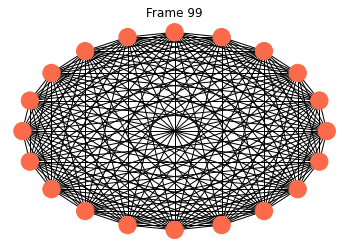

In [14]:
val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

def simple_update(num, layout, g, ax):
    ax.clear()

    # Draw the graph with random node colors
    # Random_colors = np.random.randint(2, size=n)
    values = [val_map.get(node, 0.1) for node in sol[num]]

    nx.draw_circular(g, cmap=plt.get_cmap('Reds'), node_color=sol[num], vmin=0, vmax=1)

    # nx.draw(g, pos=layout, node_color=sol[num], ax=ax)

    # Set the title
    ax.set_title("Frame {}".format(num))


def simple_animation():

    # Build plot
    fig, ax = plt.subplots(figsize=(6,4))

    # Create a graph and layout

    layout = nx.spring_layout(g)

    ani = animation.FuncAnimation(fig, simple_update, frames=100, fargs=(layout, g, ax))
    ani.save('animation_1.gif')

    plt.show()

simple_animation()